In [1]:
import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import cross_val_score
input_excel = pd.read_excel('./水厂每日出水量及各要素.xlsx')
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.rcParams['font.sans-serif'] = ['SimHei']

c:\python3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
input_excel['dayofweek'] = input_excel['日期'].apply(lambda x:x.dayofweek)
input_excel['dayofmonth'] = input_excel['日期'].apply(lambda x:x.day)
input_excel['year'] = input_excel['日期'].apply(lambda x:x.year)
input_excel['dayofyear'] = input_excel['日期'].apply(lambda x:x.dayofyear)
drop = ['日期','星期']
input_excel.drop(drop,axis = 1,inplace = True)

In [3]:
y = input_excel.pop('出水量')

In [4]:
x = pd.get_dummies(input_excel)

# 随机森林

Text(0.5,1,'随机森林平均误差')

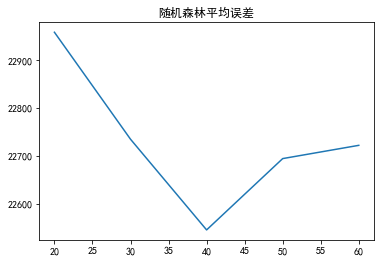

In [6]:
from sklearn.ensemble import RandomForestRegressor
random_params = [20,30,40,50,60]
random_test_scroe = []
for para in random_params:
    clf = RandomForestRegressor(para)
    test_score = -cross_val_score(clf,x,y,cv = 10,scoring='neg_mean_absolute_error')
    random_test_scroe.append(np.mean(test_score))
plt.plot(random_params,random_test_scroe)
plt.title('随机森林平均误差')

选取前一百条的预测值和真实值比较

# Xgboost

Text(0.5,1,'Xgboost平均偏差')

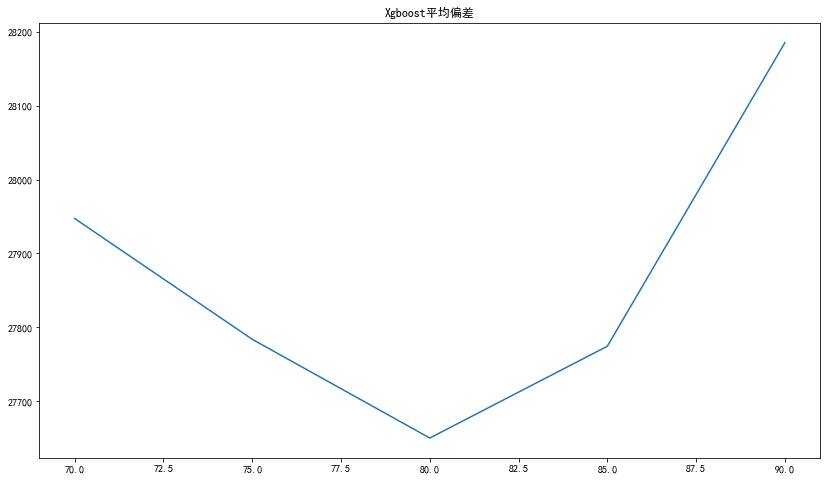

In [17]:
from xgboost import XGBRegressor
xg_params = [70,75,80,85,90]
xg_test_scores = []
for para in xg_params:
    clf = XGBRegressor(n_estimators = para)
    test_score = -cross_val_score(clf,x,y,cv = 10,scoring='neg_mean_absolute_error')
    xg_test_scores.append(np.mean(test_score))
plt.plot(xg_params, xg_test_scores)
plt.title("Xgboost平均偏差")

### 根据以上结果，RandomForestRegressor(40)的结果最好，将训练集和测试集分为4：1

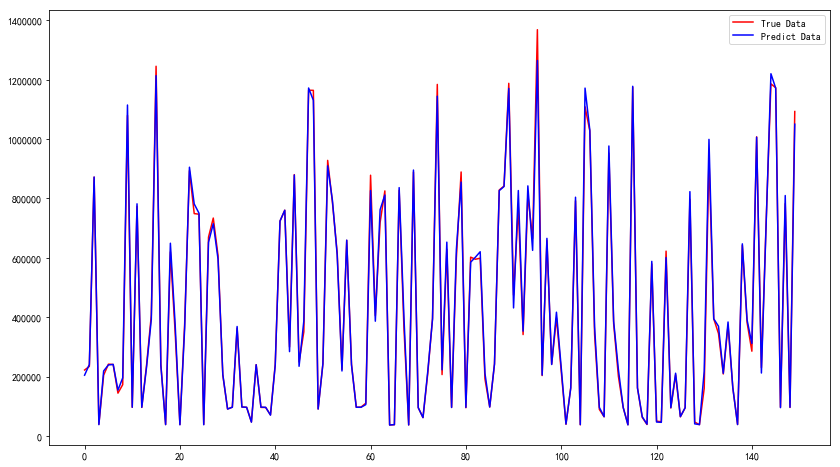

In [32]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)
plt.rcParams['figure.figsize'] = (14,8)
clf_forest = RandomForestRegressor(40) #申明模型
clf_forest.fit(x_train,y_train) #fit的过程训练的过程
predict = clf_forest.predict(x_test) #测试集预测的过程
length = 150  #选择要展示的数量
plt.plot(range(length),y_test[:length],'r',label='True Data') 
plt.plot(range(length),predict[:length],'b',label='Predict Data')
plt.legend()

## 选出南市水厂的预测值和真实值

In [33]:
def city(name,x_test,y_test,predict):
    x_test_reset = x_test.reset_index(drop =True)
    index = x_test_reset.loc[x_test_reset['各水厂名称_' + name ]==1].index
    y_test_reset = y_test.reset_index(drop =True)
    y_true = y_test_reset[index]
    y_pre = predict[index]
    plt.plot(range(len(y_true)),y_true,'r', label = name + '真实值')
    plt.plot(range(len(y_pre)),y_pre,'b',label = name + '预测值')
    plt.legend()

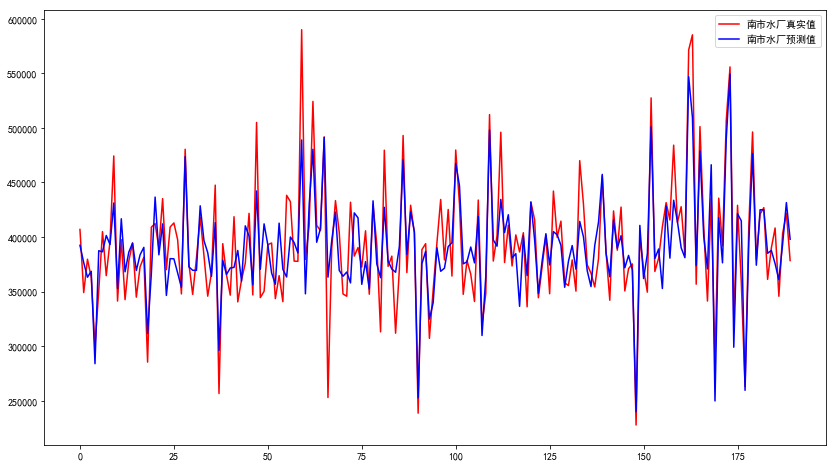

In [34]:
city('南市水厂',x_test,y_test,predict) #传入